In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:

from tkinter import Tk
from tkinter.filedialog import askopenfilename
import pandas as pd

Tk().withdraw()  # Hide GUI window
file_path = askopenfilename(title="Select your Netflix CSV file")
print("You selected:", file_path)

df = pd.read_csv(file_path)
df.head()


You selected: C:/Users/Tcs/Downloads/netflix_titles.csv.zip


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
df.info()
df.describe(include="all")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

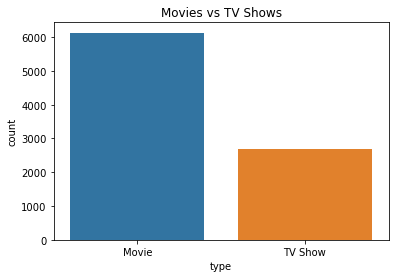

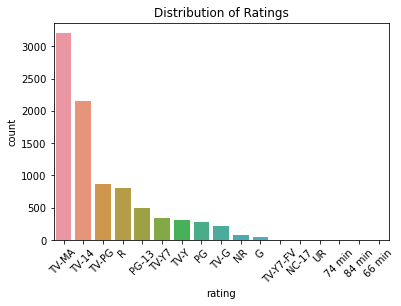

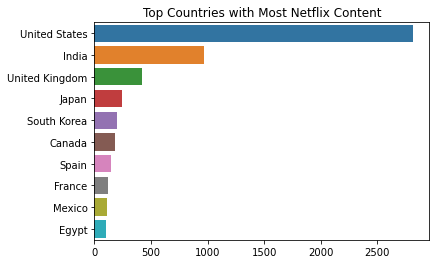

In [20]:
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows")
plt.show()

sns.countplot(data=df, x="rating", order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Ratings")
plt.show()

top_countries =df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values,y=top_countries.index)
plt.title("Top Countries with Most Netflix Content")
plt.show()

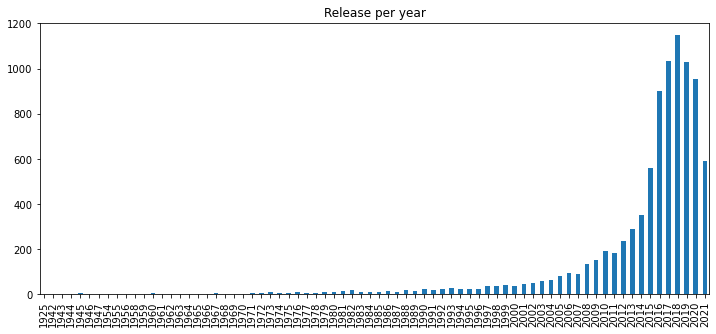

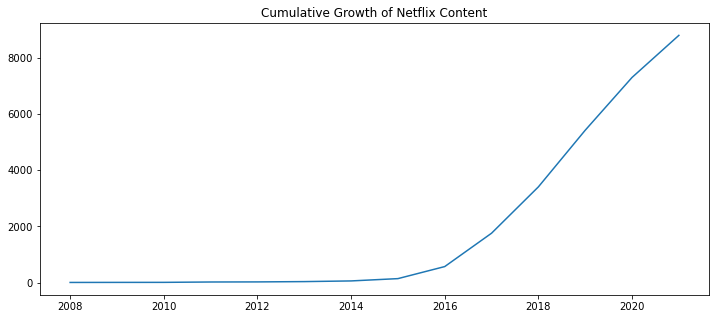

In [21]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

release_years = df['release_year'].value_counts().sort_index()
release_years.plot(kind='bar',figsize=(12,5), title="Release per year")
plt.show()

added_years = df['year_added'].value_counts().sort_index().cumsum().plot(figsize=(12,5))
plt.title("Cumulative Growth of Netflix Content")
plt.show()

C:\Users\Tcs\AppData\Local\Temp\ipykernel_8956\383201573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = movies['duration'].str.replace(" min","").astype(float)


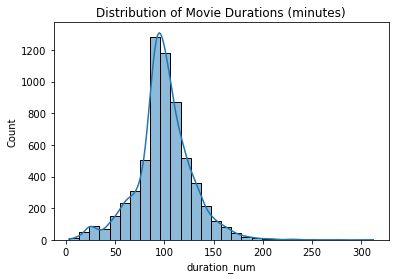

C:\Users\Tcs\AppData\Local\Temp\ipykernel_8956\383201573.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.replace(" Season","").str.replace("s","").astype(int)


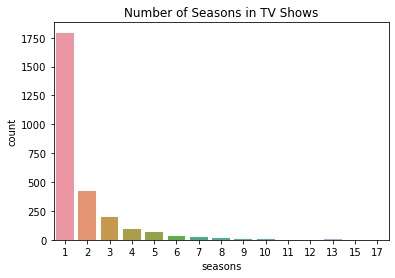

In [23]:

movies = df[df['type']=="Movie"]
movies['duration_num'] = movies['duration'].str.replace(" min","").astype(float)

sns.histplot(movies['duration_num'], bins=30, kde=True)
plt.title("Distribution of Movie Durations (minutes)")
plt.show()

tv_shows = df[df['type']=="TV Show"]
tv_shows['seasons'] = tv_shows['duration'].str.replace(" Season","").str.replace("s","").astype(int)

sns.countplot(x=tv_shows['seasons'])
plt.title("Number of Seasons in TV Shows")
plt.show()


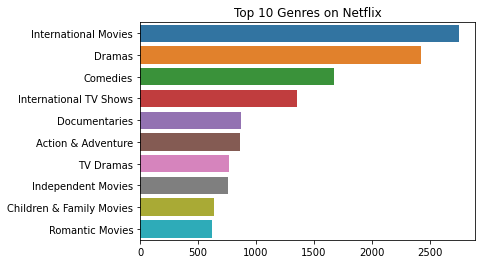

Directors with most titles:
 Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64
Actors with most appearances:
 Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64


In [24]:
all_genres = df['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.show()

top_directors = df['director'].value_counts().head(10)
print("Directors with most titles:\n", top_directors)

all_cast = df['cast'].dropna().str.split(', ').explode()
top_actors = all_cast.value_counts().head(10)
print("Actors with most appearances:\n", top_actors)

In [28]:
import os
print(os.path.exists("C:\\Windows\\Fonts\\arial.ttf"))



True


In [33]:
!pip install --upgrade pillow wordcloud


Defaulting to user installation because normal site-packages is not writeable


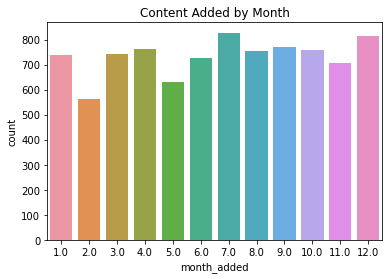

In [37]:
df['month_added'] = df['date_added'].dt.month
sns.countplot(x=df['month_added'])
plt.title("Content Added by Month")
plt.show()


In [38]:
movies_countries = movies['country'].value_counts().head(10)
tv_countries = tv_shows['country'].value_counts().head(10)

print("Top countries producing Movies:\n", movies_countries)
print("Top countries producing TV Shows:\n", tv_countries)


Top countries producing Movies:
 United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: country, dtype: int64
Top countries producing TV Shows:
 United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: country, dtype: int64


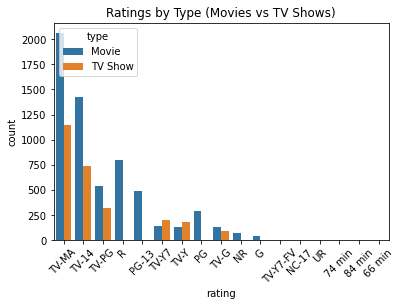

In [39]:
sns.countplot(data=df, x="rating", hue="type", order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Ratings by Type (Movies vs TV Shows)")
plt.show()


In [40]:
print("Oldest Title:", df[df['release_year']==df['release_year'].min()][['title','release_year']])
print("Newest Title:", df[df['release_year']==df['release_year'].max()][['title','release_year']])


Oldest Title:                                   title  release_year
4250  Pioneers: First Women Filmmakers*          1925
Newest Title:                           title  release_year
1                 Blood & Water          2021
2                     Ganglands          2021
3         Jailbirds New Orleans          2021
4                  Kota Factory          2021
5                 Midnight Mass          2021
...                         ...           ...
1468  What Happened to Mr. Cha?          2021
1551                      Hilda          2021
1696               Polly Pocket          2021
2920              Love Is Blind          2021
8437     The Netflix Afterparty          2021

[592 rows x 2 columns]


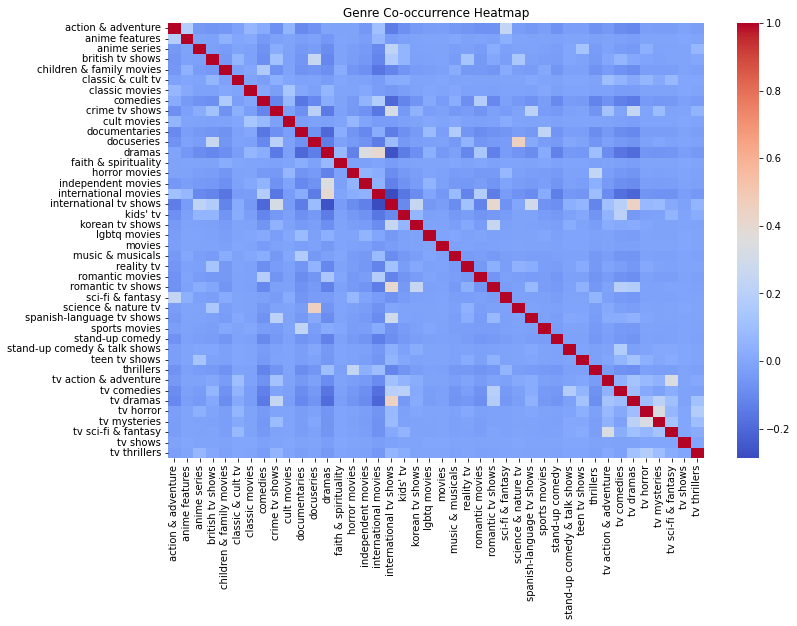

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Genre co-occurrence matrix
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_matrix = vectorizer.fit_transform(df['listed_in'].fillna(''))
genre_df = pd.DataFrame(genre_matrix.toarray(), columns=vectorizer.get_feature_names_out())

corr = genre_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Genre Co-occurrence Heatmap")
plt.show()
